<a href="https://colab.research.google.com/github/ntolayd/CE888/blob/main/Assignment/forestfire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/Test.zip"
!unzip "/content/gdrive/My Drive/Training.zip"

In [3]:
import os 
import random
import shutil

In [4]:
os.mkdir('Validation')
os.mkdir('Validation/Fire')
os.mkdir('Validation/No_Fire')

In [5]:
source = 'Training/Fire'
dest = 'Validation/Fire'
files = os.listdir(source)
no_of_files = len(files) // 5

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [6]:
source = 'Training/No_Fire'
dest = 'Validation/No_Fire'
files = os.listdir(source)
no_of_files = len(files) // 5

for file_name in random.sample(files, no_of_files):
    shutil.move(os.path.join(source, file_name), dest)


In [7]:
import numpy as np
from tqdm import tqdm
from random import shuffle
import cv2
import os 
from keras.preprocessing.image import ImageDataGenerator 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
Train_fire_dir = 'Training/Fire'
Train_nofire_dir = 'Training/No_Fire'
Validation_fire_dir ='Validation/Fire'
Validation_no_fire_dir ='Validation/No_Fire'
Test_fire_dir = 'Test/Fire'
Test_nofire_dir = 'Test/No_Fire'
Train_path = 'Training'
Test_path = 'Test'
Validation_path ='Validation'

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    Train_path,
    target_size=(254, 254),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    shuffle=True) # set as training data

validation_generator = validation_datagen.flow_from_directory(
    Validation_path, 
    target_size=(254, 254),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary', shuffle=True) # set as validation data

test_generator = test_datagen.flow_from_directory(
        Test_path,
        target_size=(254, 254),
        color_mode='rgb',
        batch_size=32,
        class_mode='binary', shuffle=False)

Found 31501 images belonging to 2 classes.
Found 7874 images belonging to 2 classes.
Found 8617 images belonging to 2 classes.


In [10]:
from keras.applications.densenet import DenseNet121
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import Dense

densenet = DenseNet121(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(densenet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


29089792/29084464 [==============================] - 0s 0us/step


In [11]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00005),
              metrics=['accuracy'])

In [12]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 32,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 32,
          epochs = 10)

Epoch 1/10
984/984 [==============================] - 619s 611ms/step - loss: 0.0750 - accuracy: 0.9678 - val_loss: 0.0124 - val_accuracy: 0.9977
Epoch 2/10
984/984 [==============================] - 597s 606ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 3/10
984/984 [==============================] - 596s 606ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0034 - val_accuracy: 0.9991
Epoch 4/10
984/984 [==============================] - 597s 607ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0261 - val_accuracy: 0.9930
Epoch 5/10
984/984 [==============================] - 595s 605ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 6/10
984/984 [==============================] - 596s 606ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0033 - val_accuracy: 0.9991
Epoch 7/10
984/984 [==============================] - 596s 605ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0061 -

In [13]:
predictions = model.predict(test_generator)


In [14]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

# predict the probability distribution of the data

# get the class with highest probability for each sample
y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      5137
           1       0.84      0.92      0.87      3480

    accuracy                           0.89      8617
   macro avg       0.89      0.90      0.89      8617
weighted avg       0.90      0.89      0.89      8617



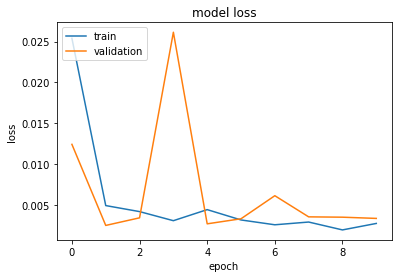

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

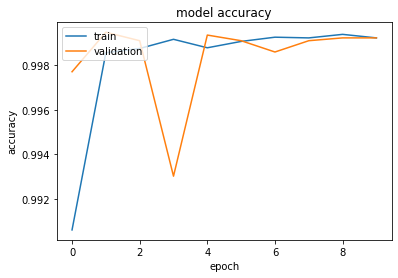

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [17]:
from keras.applications import Xception
xception = Xception(
    include_top=False,
    input_shape=(254,254,3),
    classifier_activation="sigmoid")
model = Sequential()
model.add(densenet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

83689472/83683744 [==============================] - 1s 0us/step


In [18]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00005),
              metrics=['accuracy'])

In [19]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 32,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 32,
          epochs = 10)

Epoch 1/10
984/984 [==============================] - 608s 609ms/step - loss: 0.0430 - accuracy: 0.9828 - val_loss: 0.0036 - val_accuracy: 0.9990
Epoch 2/10
984/984 [==============================] - 597s 606ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0045 - val_accuracy: 0.9991
Epoch 3/10
984/984 [==============================] - 597s 607ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9990
Epoch 4/10
984/984 [==============================] - 599s 608ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 5/10
984/984 [==============================] - 599s 608ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0040 - val_accuracy: 0.9991
Epoch 6/10
984/984 [==============================] - 598s 608ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 7/10
984/984 [==============================] - 599s 608ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0051 -

In [20]:
predictions = model.predict(test_generator)


In [21]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

# predict the probability distribution of the data

# get the class with highest probability for each sample
y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5137
           1       0.85      0.92      0.89      3480

    accuracy                           0.90      8617
   macro avg       0.90      0.91      0.90      8617
weighted avg       0.91      0.90      0.90      8617



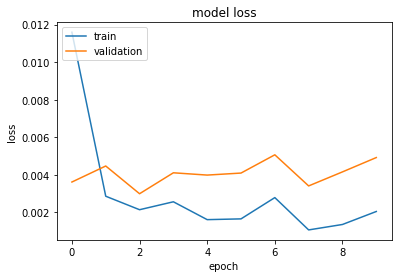

In [22]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

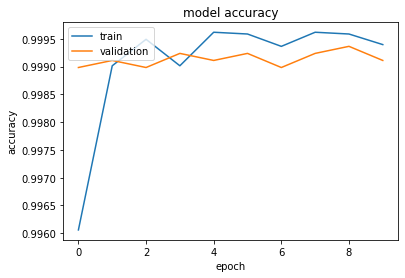

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [24]:
from keras.applications import VGG16
vgg16 = VGG16(
    include_top=False,
    input_shape=(254,254,3),
    classifier_activation="sigmoid")
model = Sequential()
model.add(densenet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

58892288/58889256 [==============================] - 0s 0us/step


In [25]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00005),
              metrics=['accuracy'])

In [26]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 32,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 32,
          epochs = 10)

Epoch 1/10
984/984 [==============================] - 608s 609ms/step - loss: 0.0579 - accuracy: 0.9767 - val_loss: 0.0028 - val_accuracy: 0.9994
Epoch 2/10
984/984 [==============================] - 598s 607ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0025 - val_accuracy: 0.9990
Epoch 3/10
984/984 [==============================] - 597s 606ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 0.9989
Epoch 4/10
984/984 [==============================] - 596s 606ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/10
984/984 [==============================] - 594s 603ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9990
Epoch 6/10
984/984 [==============================] - 589s 599ms/step - loss: 5.7415e-04 - accuracy: 0.9999 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 7/10
984/984 [==============================] - 597s 607ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.00

In [27]:
predictions = model.predict(test_generator)


In [28]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

# predict the probability distribution of the data

# get the class with highest probability for each sample
y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5137
           1       0.91      0.80      0.85      3480

    accuracy                           0.89      8617
   macro avg       0.89      0.87      0.88      8617
weighted avg       0.89      0.89      0.89      8617



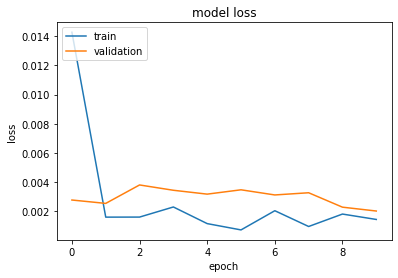

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

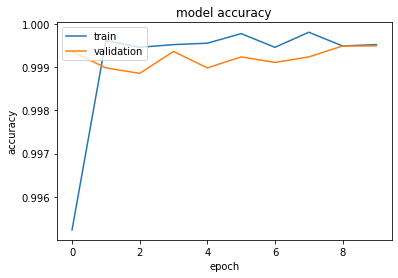

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [31]:
from keras.applications import ResNet101

resnet = ResNet101(
    include_top=False,
    input_shape=(254,254,3))
model = Sequential()
model.add(densenet)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

171450368/171446536 [==============================] - 1s 0us/step


In [32]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.00005),
              metrics=['accuracy'])

In [33]:
history = model.fit(
          train_generator,
          steps_per_epoch = train_generator.samples // 32,
          validation_data = validation_generator, 
          validation_steps = validation_generator.samples // 32,
          epochs = 10)

Epoch 1/10
984/984 [==============================] - 610s 610ms/step - loss: 0.0764 - accuracy: 0.9634 - val_loss: 0.0020 - val_accuracy: 0.9994
Epoch 2/10
984/984 [==============================] - 598s 608ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0060 - val_accuracy: 0.9990
Epoch 3/10
984/984 [==============================] - 597s 606ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9991
Epoch 4/10
984/984 [==============================] - 597s 607ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 5/10
984/984 [==============================] - 598s 607ms/step - loss: 0.0010 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9992
Epoch 6/10
984/984 [==============================] - 598s 608ms/step - loss: 7.8002e-04 - accuracy: 0.9997 - val_loss: 0.0048 - val_accuracy: 0.9995
Epoch 7/10
984/984 [==============================] - 599s 608ms/step - loss: 5.2609e-04 - accuracy: 0.9999 - val_loss: 

In [34]:
predictions = model.predict(test_generator)


In [35]:
# import classification_report
from sklearn.metrics import classification_report

# get the ground truth of your data. 
test_labels=test_generator.classes 

# predict the probability distribution of the data

# get the class with highest probability for each sample
y_pred = [1 * (x[0]>=0.5) for x in predictions]

# get the classification report
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      5137
           1       0.82      0.90      0.86      3480

    accuracy                           0.88      8617
   macro avg       0.88      0.88      0.88      8617
weighted avg       0.89      0.88      0.88      8617



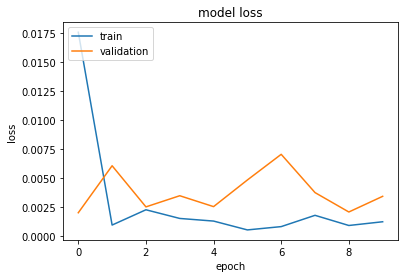

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

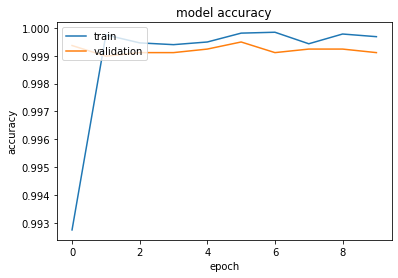

In [37]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
